#선택 분류 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
img = Image.open('/content/drive/MyDrive/인공지능사관학교/딥러닝/data/flowers/rose/10090824183_d02c613f10_m.jpg') #이미지 파일 을 열고 저장

In [3]:
path = '/content/drive/MyDrive/인공지능사관학교/딥러닝/data/flowers/'

In [4]:
def list_dir(path):
    file_names = os.listdir(path)
    file_names.sort()
    return file_names

target_names = list_dir(path)

In [5]:
for idx,target in enumerate(target_names): #종속 변수 이름을 가진 폴더로 접근
    subpath = path+target #꽃데이터 바로 위 폴더 까지 접근 하는 변수

    filenames = list_dir(subpath)

In [6]:
print(filenames)

['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg', '10128546863_8de70c610d.jpg', '10163955604_ae0b830975_n.jpg', '10164073235_f29931d91e.jpg', '10686568196_b1915544a8.jpg', '107693873_86021ac4ea_n.jpg', '10791227_7168491604.jpg', '10995953955_089572caf0.jpg', '110147301_ad921e2828.jpg', '112334842_3ecf7585dd.jpg', '112428665_d8f3632f36_n.jpg', '112428919_f0c5ad7d9d_n.jpg', '112650879_82adc2cc04_n.jpg', '112651128_7b5d39a346_m.jpg', '112951022_4892b1348b_n.jpg', '112951086_150a59d499_n.jpg', '113291410_1bdc718ed8_n.jpg', '113902743_8f537f769b_n.jpg', '113960470_38fab8f2fb_m.jpg', '11441893003_ab83672800.jpg', '11614202956_1dcf1c96a1.jpg', '116343334_9cb4acdc57_n.jpg', '11746080_963537acdc.jpg', '11746276_de3dec8201.jpg', '11746367_d23a35b085_n.jpg', '11746452_5bc1749a36.jpg', '11746548_26b3256922_n.jpg', '12024561754_ce9667e4dc_n.jpg', '12025038686_7f10811d4b_n.jpg', '12025042086_78bafc0eb6_n.jpg', '12163418275_bd6a1edd61.jpg', '122450705_9885fff3

In [7]:
image_path = os.path.join(subpath,filenames[3])
img = Image.open(image_path)

resized = img.resize([100,100])
resize_np_array = np.array(resized)

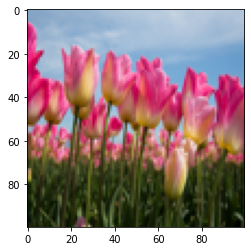

In [8]:
plt.imshow(resized)
plt.show()

In [9]:
#이미지 크기 조정 함수
def load_image_pixels(imagepath,resolution):
    img = Image.open(imagepath)
    img_resize = img.resize(resolution) #사용자가 지정한 size 크기 조정
    return np.array(img_resize)

resolution = [100,100]
pixels =load_image_pixels(image_path,resolution)

print(pixels)

[[[133 164 196]
  [135 165 197]
  [134 165 196]
  ...
  [177 195 216]
  [180 197 217]
  [182 199 217]]

 [[129 162 196]
  [133 164 197]
  [135 166 198]
  ...
  [177 195 216]
  [179 197 217]
  [182 199 217]]

 [[130 161 196]
  [133 163 197]
  [134 164 198]
  ...
  [177 195 216]
  [179 197 217]
  [182 199 217]]

 ...

 [[  3  13   0]
  [  9  18   9]
  [ 30  42  18]
  ...
  [  0   5   0]
  [ 33  45  16]
  [ 58  72  38]]

 [[  9  22   2]
  [ 29  35  12]
  [ 26  39  15]
  ...
  [  1   4   0]
  [ 35  46  16]
  [ 51  63  26]]

 [[  7  16   2]
  [ 36  42  14]
  [ 24  34  10]
  ...
  [  0   0   0]
  [ 32  43  14]
  [ 44  58  17]]]


In [ ]:
def flowers_init(resolution):
    global pixels, idx
    path = '/content/drive/MyDrive/인공지능사관학교/딥러닝/data/flowers/'
    resolution = [100,100]
    images = []
    idxs = []
    target_names = list_dir(path)
    for idx, target in enumerate(target_names):  # 종속 변수 이름을 가진 폴더로 접근
        print(target)
        subpath = path + target  # 꽃데이터 바로 위 폴더 까지 접근 하는 변수
        print(subpath)
        filenames = list_dir(subpath)
        print(filenames[:3])

        for fname in filenames:
            if fname[-4:] != '.jpg':
                continue
            imagepath = os.path.join(subpath,fname) #subpath 와 이미지를 결합
            pixels=load_image_pixels(imagepath,resolution)

            images.append(pixels)
            idxs.append(idx)

    xs = np.asarray(images,dtype = np.float32)
    ys = onehot(idxs,len(target_names))
    return xs,ys

xs,ys = flowers_init(resolution)


daisy
/content/drive/MyDrive/인공지능사관학교/딥러닝/data/flowers/daisy
['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dandelion
/content/drive/MyDrive/인공지능사관학교/딥러닝/data/flowers/dandelion
['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
rose
/content/drive/MyDrive/인공지능사관학교/딥러닝/data/flowers/rose
['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
sunflower
/content/drive/MyDrive/인공지능사관학교/딥러닝/data/flowers/sunflower
['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
tulip
/content/drive/MyDrive/인공지능사관학교/딥러닝/data/flowers/tulip
['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


NameError: ignored

In [ ]:
def onehot(idxs,cnt):
  return np.eye(cnt)[idxs] #cnt = 종속변수 idxs = 원핫 시킬 위치

In [ ]:
print(xs.shape)
print(ys.shape)

In [ ]:
#정규화 
#min_max 
xs_norm = xs/255.0

In [ ]:
print(xs_norm.shape)

In [ ]:
#shuffle_map
shuffle_map = np.arange(xs_norm.shape[0])
np.random.shuffle(shuffle_map)

In [ ]:
#test_begin_index
train_ratio = 0.8
test_begin_index = int(xs_norm.shape[0] * train_ratio)


In [ ]:
#train_test_split
train_x = xs_norm[shuffle_map[:test_begin_index]]
train_y = ys[shuffle_map[:test_begin_index]]

test_x = xs_norm[shuffle_map[test_begin_index:]]
test_y = ys[shuffle_map[test_begin_index:]]

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

##model


In [ ]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3), #한장이 들어가는 크기 100 100 3(RGB값)
    filters=16, strides = (1,1),padding = 'valid'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units=5, activation = 'softmax') #분류 하고자 하는 데이터 가 5개 니까 UNIT  = 5
])

#print(model_0.summary())

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3),filters=32),
    tf.keras.layers.MaxPool2D(strides = (2,2),pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 64),
    tf.keras.layers.AvgPool2D(strides = (2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(units=5, activation = 'softmax')
])
#print(model_1.summary())


model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(100,100,32),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters = 128, padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=5, activation = 'softmax')
])

In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),loss = 'categorical_crossentropy',metrics = [tf.keras.metrics.TruePositives(name = 'TP'),tf.keras.metrics.FalsePositives(name = 'FP')])

In [ ]:
history = model_1.fit(train_x,train_y,epochs = 50,batch_size = 32,validation_split = 0.2)

In [ ]:
##확률 분포로 표시
plt.figure(figsize=(20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)

    i = np.random.choice(864)
    img = test_x[i]
    img_Image = Image.fromarray(np.uint8(img))
    plt.imshow(img_Image)

    plt.title('pred_y : {} , test_y : {} \nProb : {}'.format(np.argmax(pred_y[i]), np.argmax(test_y[i]),
                                                             np.round(pred_y[i], 3)))
    plt.axis('off')

plt.draw()